In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook

from threeML import *
from astromodels.xspec import *

In [3]:
get_available_plugins()

Available plugins:

FermiGBMTTELike for Fermi GBM TTE (all detectors)
OGIPLike for All OGIP-compliant instruments
FermiLATLLELike for Fermi LAT LLE
FermipyLike for Fermi LAT (with fermipy)
XYLike for n.a.
EventListLike for Generic EventList data
GRONDLike for GROND 7-band photometric imager
PhotometryLike for Generic photometric data
SwiftXRTLike for Swift XRT
SpectrumLike for General binned spectral data


## Setup

The GROND pluging takes magnitudes and magnitude errors. Typically, filters with capital letters are calibrated to the Vega magnitude system, but in the case that those values have been taken from AB corrected GCNs, one must take care to set **use_vega=False**.

If you do not have a local GROND filter file, the plugin will attempt to download and save one for you. 

In [4]:
grond = GRONDLike('GROND',
              g=20.93,g_err=.23,
              r=19.96,r_err=0.12,
              i=18.08,i_err=.07,
              z=17.82,z_err=.04,
              J=16.29,J_err=.03,
              H=15.28,H_err=.03,
              K=14.68,K_err=.04,
              use_vega=False)

Using chi2 statistic with the provided errors.


<IPython.core.display.Javascript object>


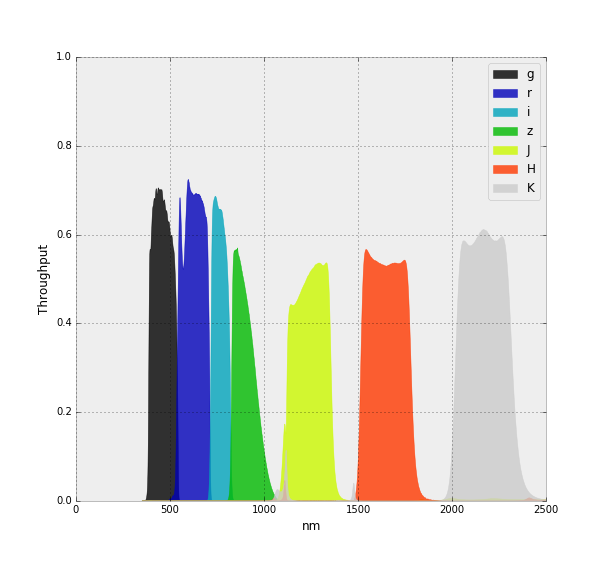

In [12]:
_=grond.display_filters()

### Model specification

Here we use XSPEC's dust extinction models for the milky way and the host 

In [7]:
spec =  Powerlaw() * XS_zdust() * XS_zdust()

data_list = DataList(grond)

model = Model(PointSource('grb',0,0,spectral_shape=spec))


spec.redshift_2 = 0.542
spec.redshift_2.fix = True

spec.e_bmv_2 = 0.03
spec.e_bmv_2.fix = True
spec.rv_2 = 0.03/3.8
spec.rv_2.fix = True
spec.redshift_2 = 0.542
spec.redshift_2.fix=True
spec.method_2 = 3
spec.method_2.fix=True



spec.e_bmv_3 = 0.0087
spec.e_bmv_3.fix = True
spec.rv_3=3.08
spec.rv_3.fix=True
spec.redshift_3 = 0
spec.redshift_3.fix=True
spec.method_3 = 1
spec.method_3.fix=True

jl = JointLikelihood(model,data_list)

model.display()

(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(J) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(H) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(K) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (2):
--------------------

                                    value min_value max_value             unit
grb.spectrum.main.composite.K_1         1      None      None  1 / (cm2 keV s)
grb.spectrum.main.composite.index_1    -2       -10        10                 

Fixed parameters (11):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

In [8]:
jl.set_minimizer('ROOT')
_ = jl.fit()


Best fit values:



,Value,Unit
grb.spectrum.main.composite.K_1,(8.57 +/- 0.18) x 10,1 / (cm2 keV s)
grb.spectrum.main.composite.index_1,(-2.320 +/- 0.029) x 10^-1,



Correlation matrix:



1.00,-1.00
-1.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
GROND,112.003303
total,112.003303


## Examine the fit

<IPython.core.display.Javascript object>


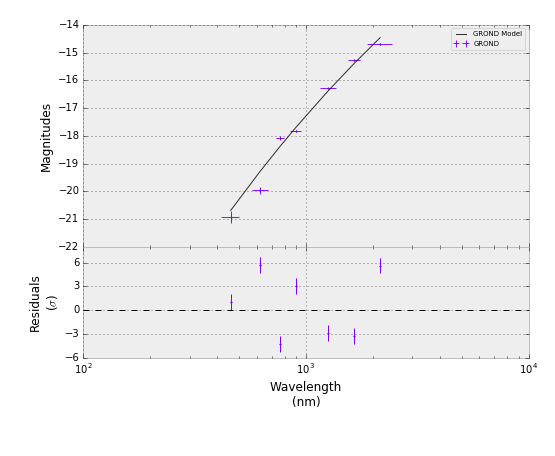

In [9]:
_=display_photometry_model_magnitudes(jl)

<IPython.core.display.Javascript object>


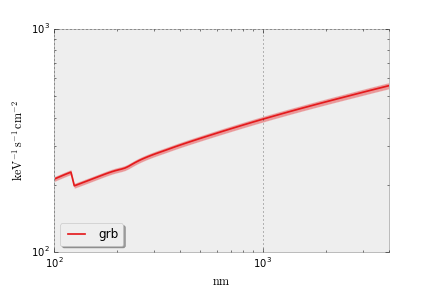

In [10]:
_ = plot_point_source_spectra(jl.results,energy_unit='nm',ene_min=100,ene_max=4000)